# Importing Libralies

In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import pickle


#  Reading Dataset

In [204]:
df=pd.read_csv(r"C:\Users\saisu\OneDrive\Desktop\Project\train.csv")

In [205]:
df.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1001 non-null   object 
 1   Age                         1001 non-null   object 
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(5), object(5)
memory usage: 78.3+ KB


In [207]:
df.describe()

,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,95.950000,3.321000,39.898000,15.611000,22.560000
std,38.850442,1.914582,26.393867,8.819493,8.516274
min,40.000000,1.000000,5.000000,2.000000,8.000000
25%,65.000000,2.000000,20.000000,8.000000,17.750000
50%,85.000000,3.000000,33.000000,14.000000,22.000000
75%,120.000000,4.000000,55.000000,22.000000,28.000000
max,200.000000,8.000000,110.000000,40.000000,50.000000


# Data Cleaning And Data Transforming

In [208]:
df.dtypes

User_ID                        object
Age                            object
Gender                         object
Platform                       object
Daily_Usage_Time (minutes)    float64
Posts_Per_Day                 float64
Likes_Received_Per_Day        float64
Comments_Received_Per_Day     float64
Messages_Sent_Per_Day         float64
Dominant_Emotion               object
dtype: object

- `Age` is Numeric but it showing object type , So we have to convert it to Numeric Data type

In [209]:
df["Age"].unique()

array(['25', '30', '22', '28', '33', '21', '27', '24', '29', '31', '23',
       '26', '34', '35', '32', 'Male', 'Female', 'Non-binary',
       ' işte mevcut veri kümesini 1000 satıra tamamlıyorum:'],
      dtype=object)

- Other Than Numeric are considered as NUll

In [210]:
df["Age"]=pd.to_numeric(df["Age"],errors='coerce')

In [211]:
df.dtypes

User_ID                        object
Age                           float64
Gender                         object
Platform                       object
Daily_Usage_Time (minutes)    float64
Posts_Per_Day                 float64
Likes_Received_Per_Day        float64
Comments_Received_Per_Day     float64
Messages_Sent_Per_Day         float64
Dominant_Emotion               object
dtype: object

In [212]:
df.duplicated().sum()

0

In [213]:
df.isnull().sum()

User_ID                        0
Age                           77
Gender                         1
Platform                       1
Daily_Usage_Time (minutes)     1
Posts_Per_Day                  1
Likes_Received_Per_Day         1
Comments_Received_Per_Day      1
Messages_Sent_Per_Day          1
Dominant_Emotion               1
dtype: int64

In [214]:
df["Age"].median(),df["Age"].mean()

(27.0, 27.5)

- from above we can say that Age column dont have any outliers so that mean and median are same so we can fill the null values with mean

In [215]:
df["Age"]=df["Age"].fillna(df["Age"].mean())

In [216]:
df.isnull().sum()

User_ID                       0
Age                           0
Gender                        1
Platform                      1
Daily_Usage_Time (minutes)    1
Posts_Per_Day                 1
Likes_Received_Per_Day        1
Comments_Received_Per_Day     1
Messages_Sent_Per_Day         1
Dominant_Emotion              1
dtype: int64

- remaining Null vales data is << 1% , so we can drop it

In [217]:
df=df.dropna()

In [218]:
df.isnull().sum()

User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64

In [219]:
df=df.drop(columns=["User_ID"])# it is useless

- Now we are dividing data into three variable `Categarical`,`Numeric`,`Target`

In [220]:
Cat=df[["Gender","Platform"]]
Num=df[df.describe().keys()]
Target=df[["Dominant_Emotion"]]

In [221]:
print(Cat.keys())
Cat.head()

Index(['Gender', 'Platform'], dtype='object')


,Gender,Platform
0,Female,Instagram
1,Male,Twitter
2,Non-binary,Facebook
3,Female,Instagram
4,Male,LinkedIn


In [222]:
print(Num.keys())
Num.head()

Index(['Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day',
       'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day'],
      dtype='object')


,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
0,25.0,120.0,3.0,45.0,10.0,12.0
1,30.0,90.0,5.0,20.0,25.0,30.0
2,22.0,60.0,2.0,15.0,5.0,20.0
3,28.0,200.0,8.0,100.0,30.0,50.0
4,33.0,45.0,1.0,5.0,2.0,10.0


In [223]:
print(Target.keys())
Target.head()

Index(['Dominant_Emotion'], dtype='object')


,Dominant_Emotion
0,Happiness
1,Anger
2,Neutral
3,Anxiety
4,Boredom


- Checking Outliers

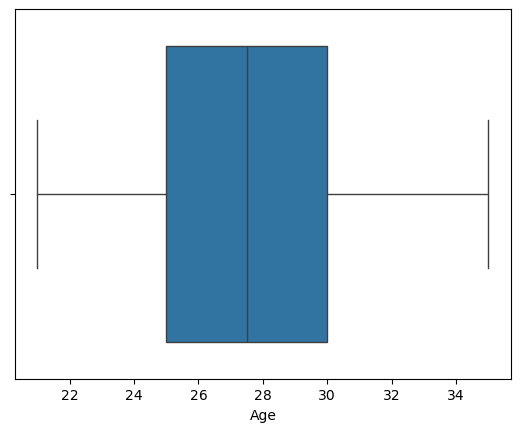

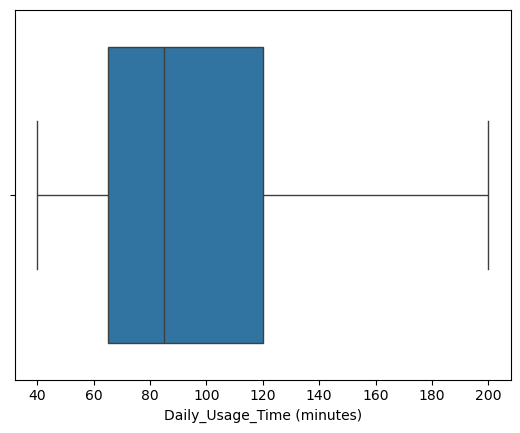

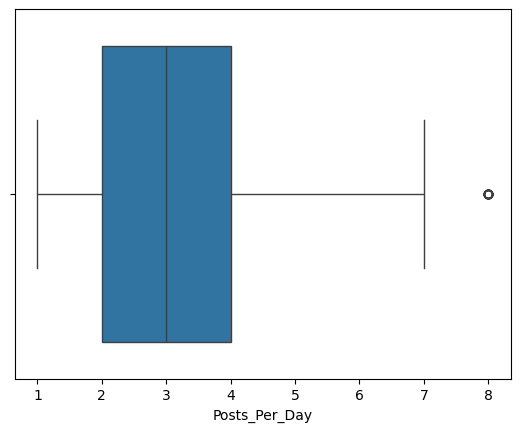

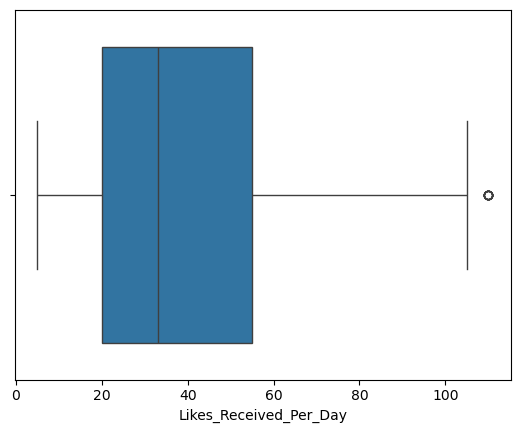

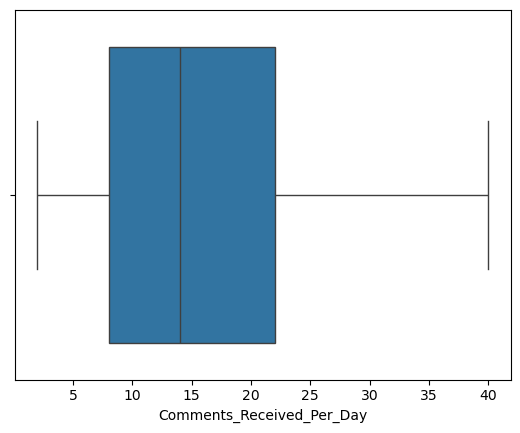

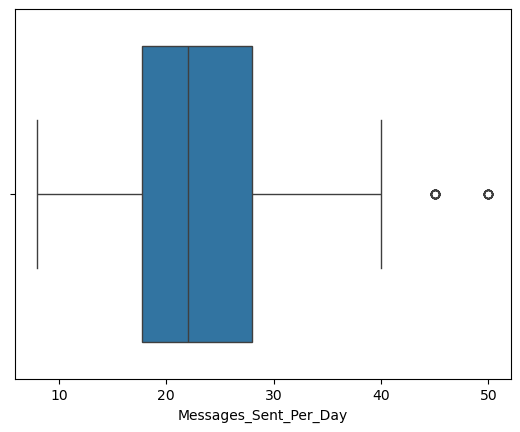

In [224]:
for i in Num.keys():
  sns.boxplot(data=Num,x=Num[i])
  plt.show()

- we have outliers in `Messages_Sent_Per_Day`,`Likes_Received_Per_Day`,`Posts_Per_Day` So we have to replace them other wise it will disturb our data

- Q1 = df[" column_name "].quantile(0.25)
- Q3 = df[" column_name "].quantile(0.75)
- IQR = Q3 - Q1
- lower_bound = Q1 - 1.5 * IQR
- upper_bound = Q3 + 1.5 * IQR

In [225]:
for i in ["Messages_Sent_Per_Day", "Likes_Received_Per_Day", "Posts_Per_Day"]:
    Q1 = Num[i].quantile(0.25)
    Q3 = Num[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Correct lambda without nesting
    Num[i] = Num[i].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))


    Num[i] = pd.to_numeric(Num[i])


In [226]:
Num.describe()

,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,27.500000,95.950000,3.292000,39.875500,15.611000,22.462875
std,3.788582,38.850442,1.849908,26.335039,8.819493,8.245032
min,21.000000,40.000000,1.000000,5.000000,2.000000,8.000000
25%,25.000000,65.000000,2.000000,20.000000,8.000000,17.750000
50%,27.500000,85.000000,3.000000,33.000000,14.000000,22.000000
75%,30.000000,120.000000,4.000000,55.000000,22.000000,28.000000
max,35.000000,200.000000,7.000000,107.500000,40.000000,43.375000


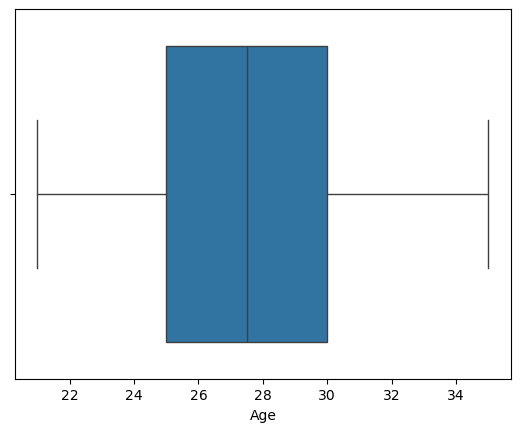

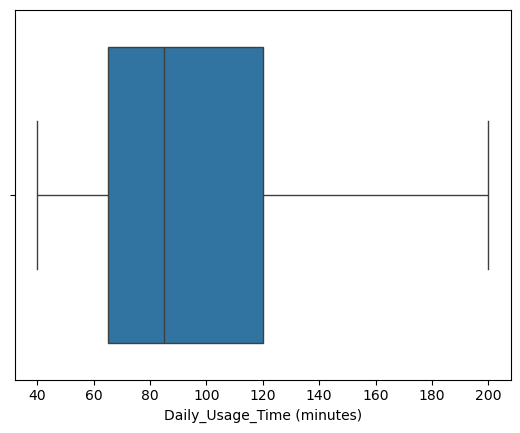

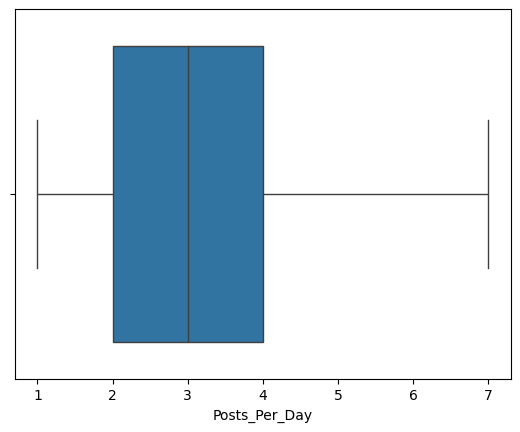

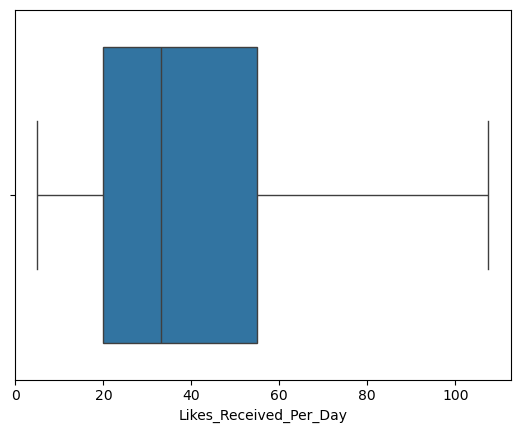

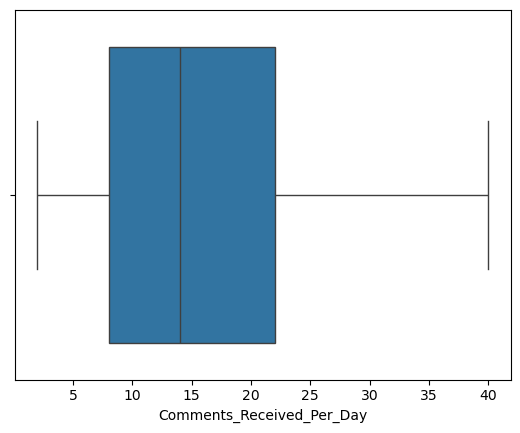

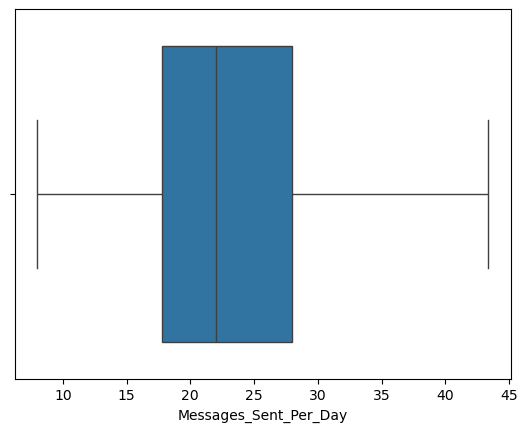

In [227]:
for i in Num.keys():
  sns.boxplot(data=Num,x=Num[i])
  plt.show()

In [228]:
for i in Cat.keys():
  print(f"Unique Values Are : {Cat[i].nunique()} \n {Cat[i].unique()}")

Unique Values Are : 18 
 ['Female' 'Male' 'Non-binary' '27' '24' '29' '33' '31' '22' '25' '28' '30'
 '23' '34' '26' '35' '21' '32']
Unique Values Are : 7 
 ['Instagram' 'Twitter' 'Facebook' 'LinkedIn' 'Whatsapp' 'Telegram'
 'Snapchat']


- In `Gender` We Have To fill other Values With Most repeated Values

In [229]:
Cat["Gender"] = Cat["Gender"].apply(lambda x: Cat["Gender"].mode()[0] if x not in ['Female', 'Male', 'Non-binary'] else x)


In [230]:
for i in Cat.keys():
  print(f"Unique Values Are : {Cat[i].nunique()} \n {Cat[i].unique()}")

Unique Values Are : 3 
 ['Female' 'Male' 'Non-binary']
Unique Values Are : 7 
 ['Instagram' 'Twitter' 'Facebook' 'LinkedIn' 'Whatsapp' 'Telegram'
 'Snapchat']


- Correlation Matrix Amoung Independent Variable

In [231]:
Num.corr()

,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
Age,1.000000,0.078652,0.027280,0.054977,0.093394,0.098730
Daily_Usage_Time (minutes),0.078652,1.000000,0.882166,0.941152,0.896920,0.917624
Posts_Per_Day,0.027280,0.882166,1.000000,0.911826,0.910771,0.866515
Likes_Received_Per_Day,0.054977,0.941152,0.911826,1.000000,0.930772,0.910992
Comments_Received_Per_Day,0.093394,0.896920,0.910771,0.930772,1.000000,0.884127
Messages_Sent_Per_Day,0.098730,0.917624,0.866515,0.910992,0.884127,1.000000


## i want to remove `Likes_Received_Per_Day`,`Comments_Received_Per_Day`,`Messages_Sent_Per_Day` Due To High Correlation

- Daily_Usage_Time           <--> Likes_Received_Per_Day    - 0.941152
- Likes_Received_Per_Day     <--> Comments_Received_Per_Day - 0.930772
- Daily_Usage_Time (minutes) <--> Messages_Sent_Per_Day     - 0.917624


In [232]:
Num=Num.drop(columns=["Likes_Received_Per_Day","Comments_Received_Per_Day","Messages_Sent_Per_Day"])

In [233]:
selected_columns_dict= {
    'numerical':Num.columns,
    'categorical': Cat.columns
}

In [234]:
with open("selected_columns.pkl", "wb") as f:
    pickle.dump(selected_columns_dict, f)
#joblib.dump(selected_columns_dict,'selected_columns.pkl')

# Exploratory Data Analysis

## Analysing Categorical Data Distribution With Respective Dominant Emotion

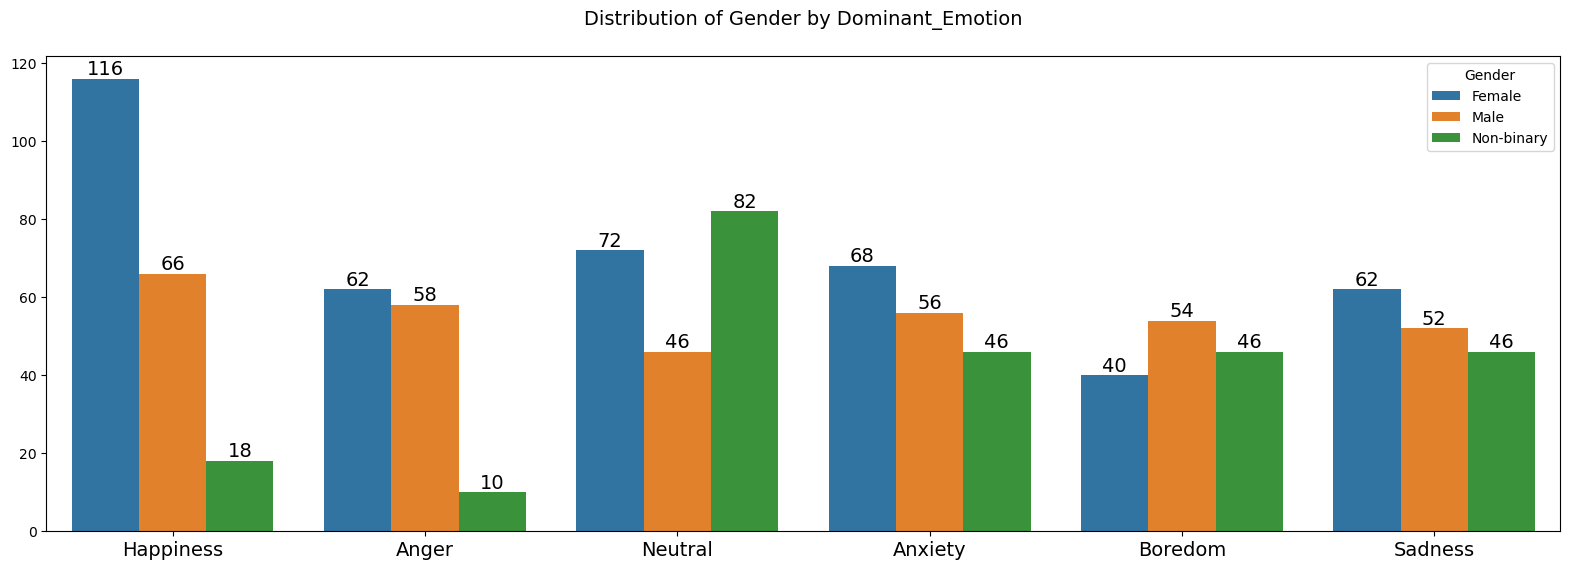

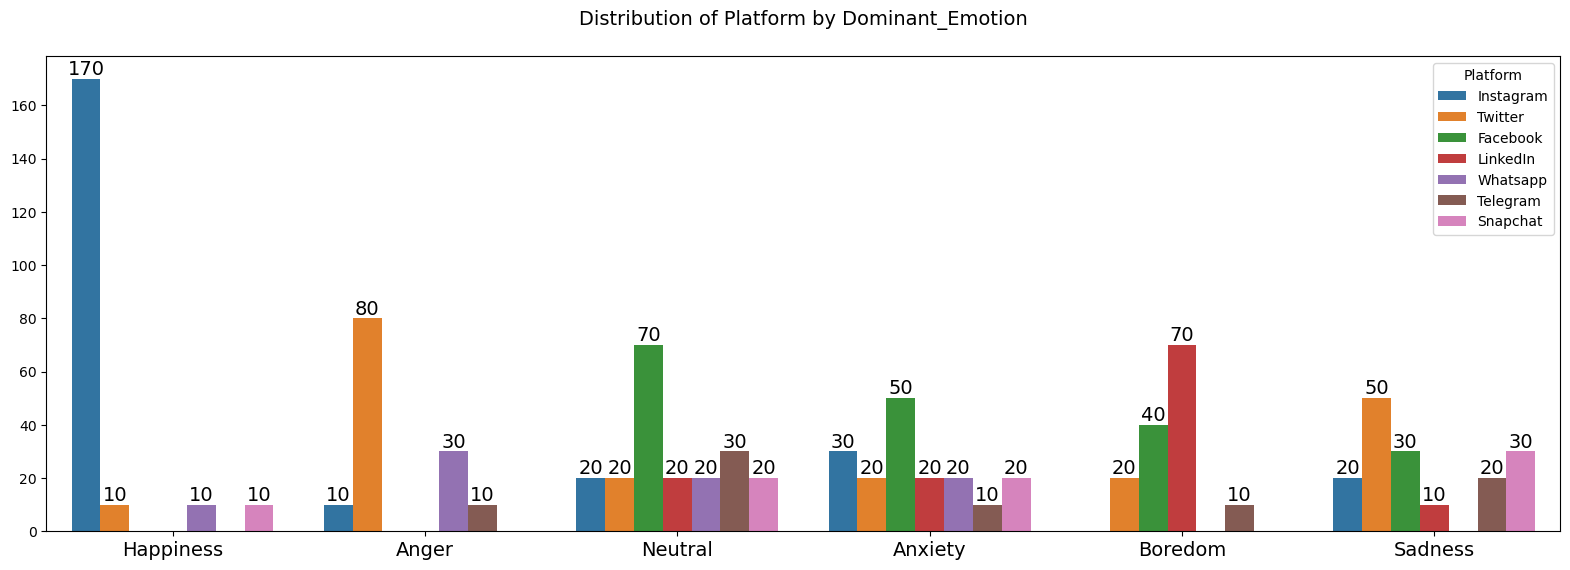

In [235]:
for i in Cat.columns:
    plt.figure(figsize=(16,6))
    ax=sns.countplot(hue=Cat[i], x=Target["Dominant_Emotion"])
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fontsize=14)
    plt.title(f'Distribution of {i} by Dominant_Emotion\n',fontsize=14)
    plt.tight_layout()
    plt.xticks(rotation=0,fontsize=14)
    plt.tight_layout()
    plt.xlabel(None)
    plt.ylabel(None)
    plt.show()

## Analysing Numerical Data Distribution With Respective Dominant Emotion

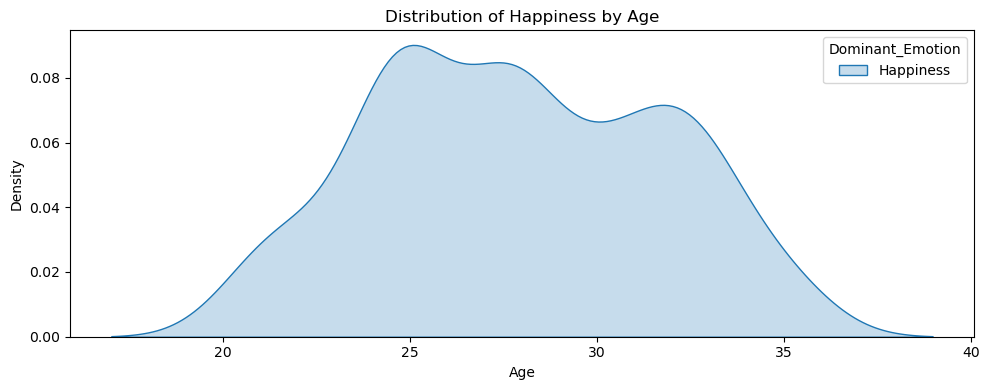

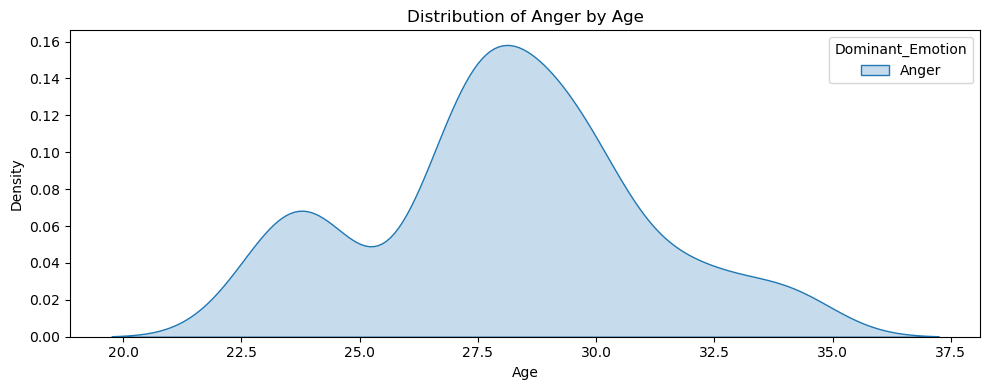

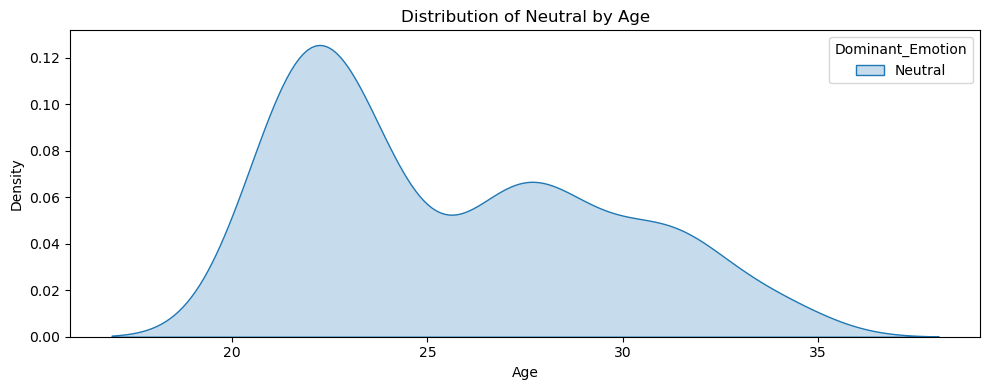

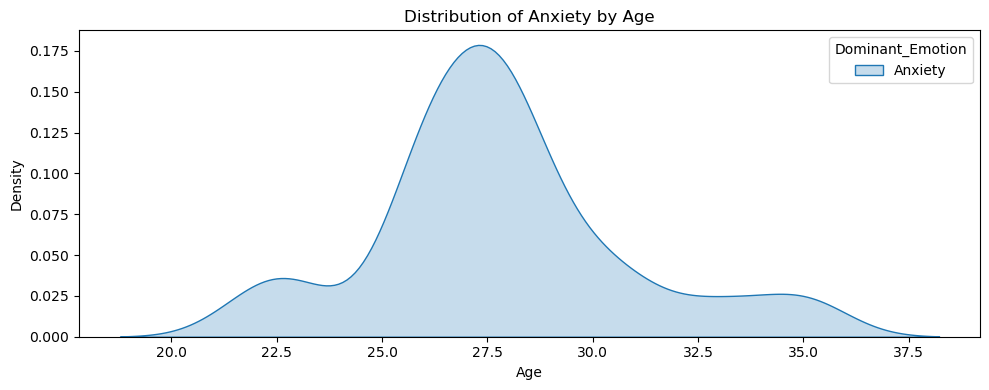

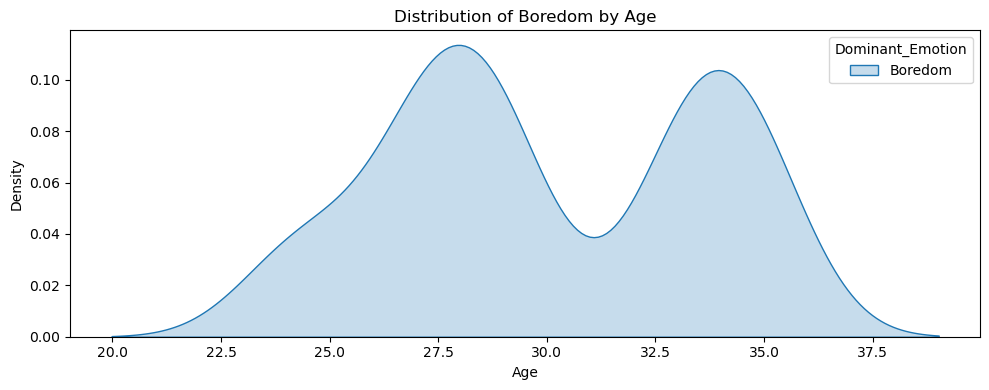

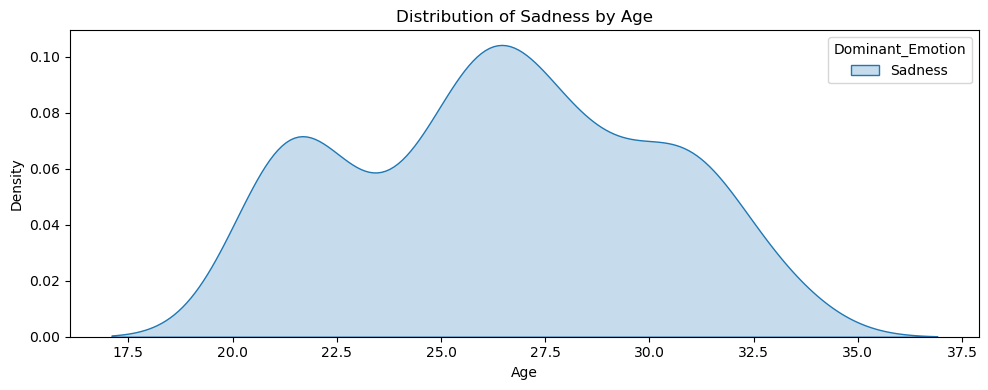

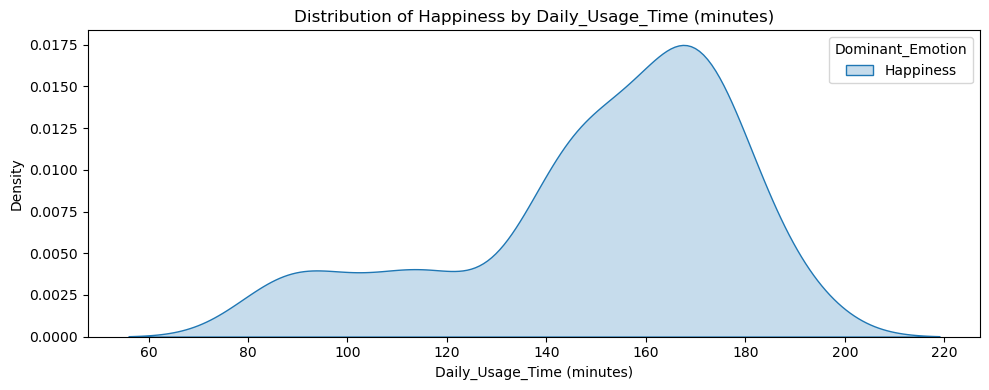

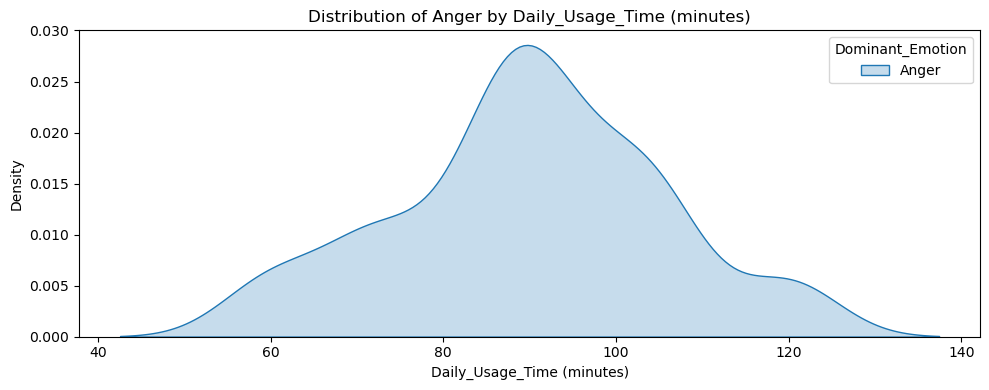

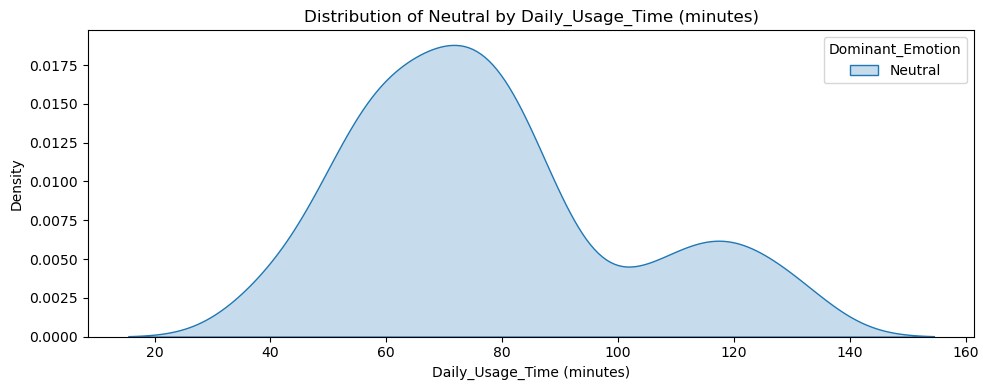

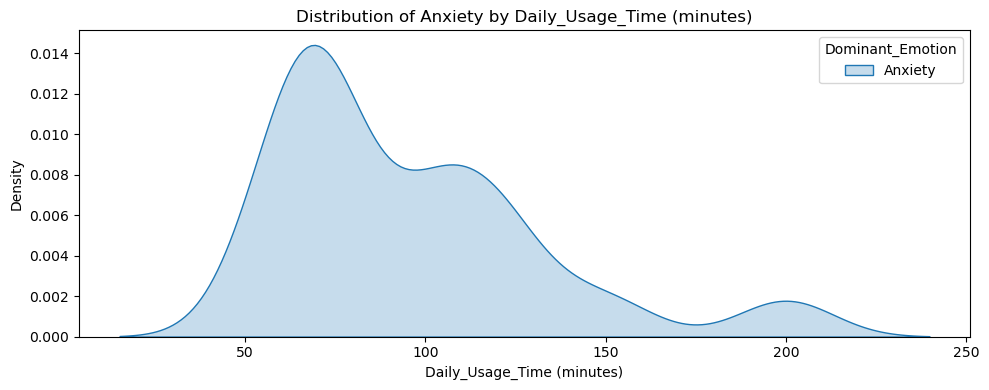

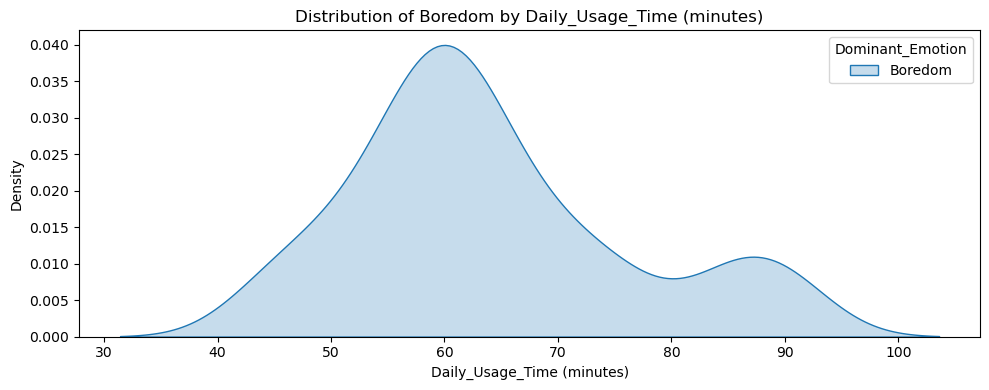

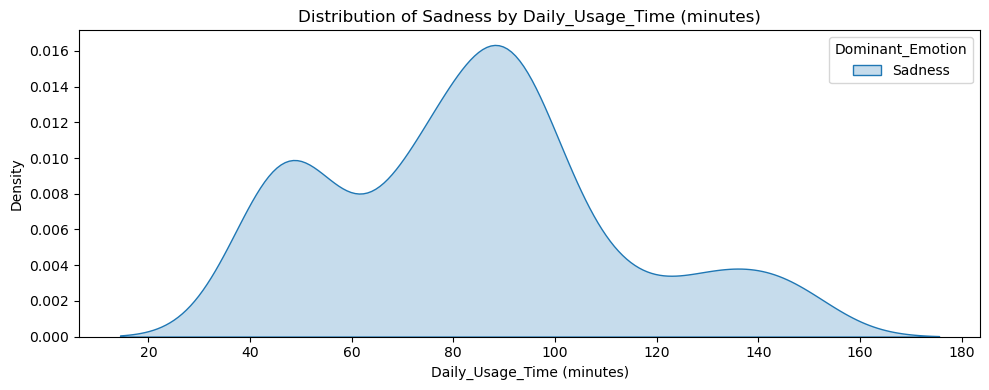

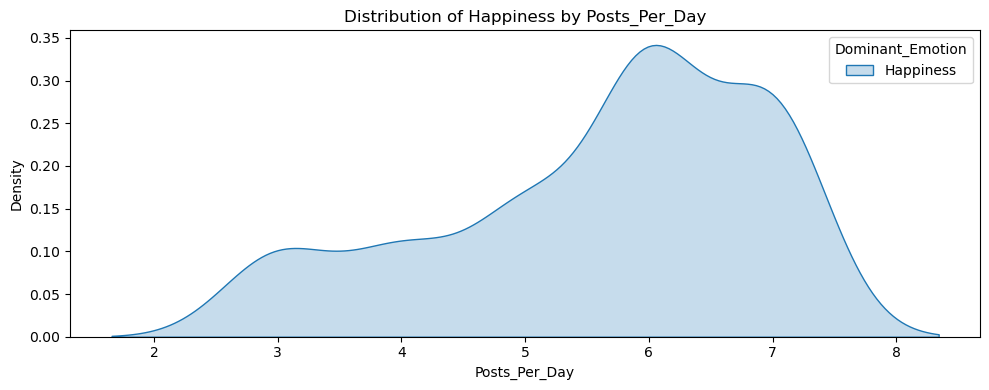

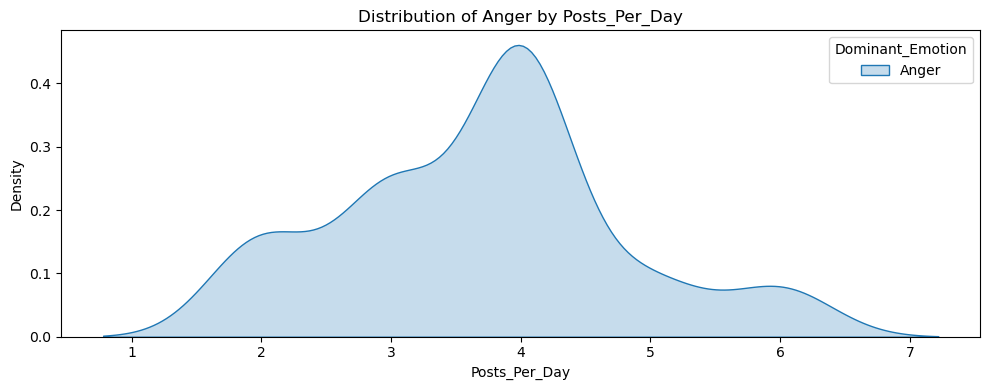

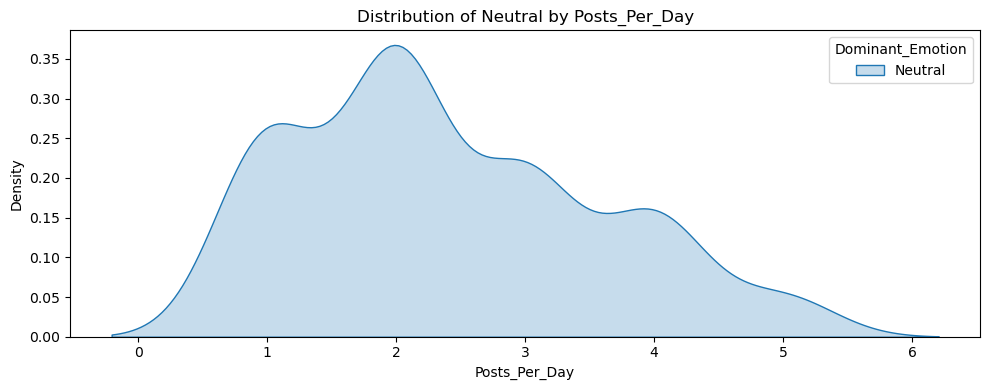

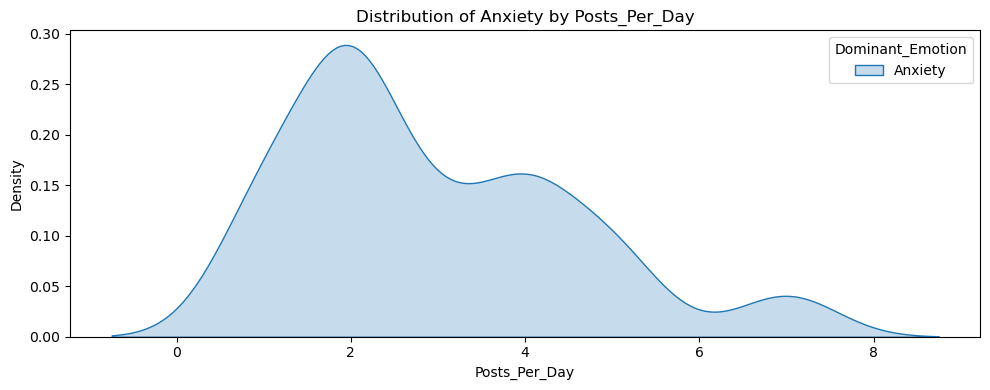

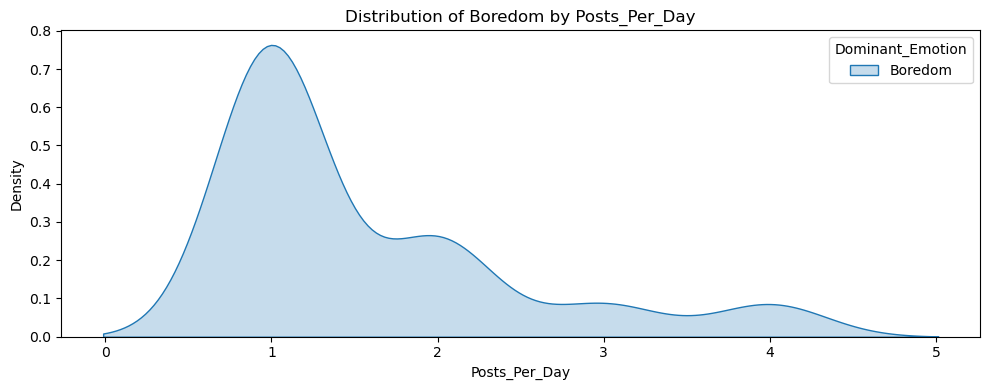

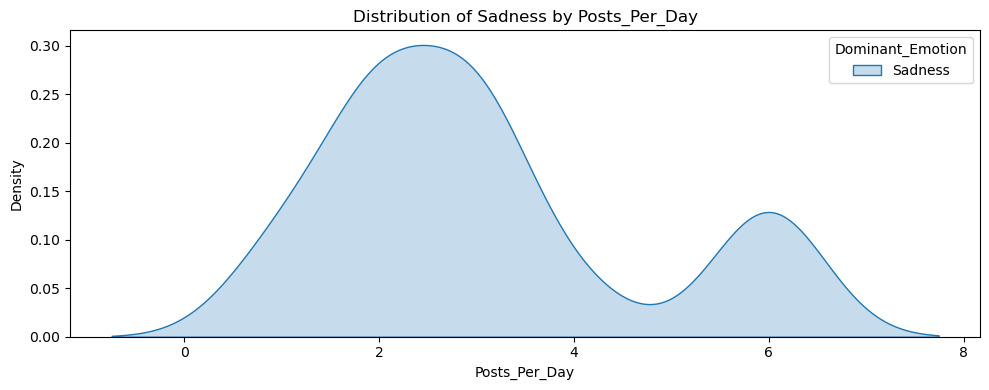

In [236]:
for j in Num.keys():
  for i in Target['Dominant_Emotion'].unique():
    plt.figure(figsize=(10, 4))
    sns.kdeplot(data=Num.join(Target), x=Num[j], hue=Target['Dominant_Emotion'][Target['Dominant_Emotion']==i], fill=True)
    plt.title(f'Distribution of {i} by {j}', fontsize=12)
    plt.xlabel(j, fontsize=10)
    plt.ylabel("Density", fontsize=10)
    plt.xticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.show()
    print("\n\n")

# Data Encoding And Scaling

## Target

In [237]:
Target["Dominant_Emotion"].unique()

array(['Happiness', 'Anger', 'Neutral', 'Anxiety', 'Boredom', 'Sadness'],
      dtype=object)

- We Can Order The Dominant Emotion So I am Using Label Encoding
- Happiness - 0
- Neutral - 1
- Boredom - 2
- Anxiety - 3
- Anger - 4
- Sadness - 5

In [238]:
emotion_order = ['Happiness', 'Neutral', 'Boredom', 'Anxiety', 'Anger', 'Sadness']

In [239]:
L_E = LabelEncoder()

In [240]:
L_E.classes_ = emotion_order

In [241]:
Target['Dominant_Emotion'] = L_E.fit_transform(Target['Dominant_Emotion'])


In [242]:
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(L_E, f)

In [243]:
Target["Dominant_Emotion"].head()

0    3
1    0
2    4
3    1
4    2
Name: Dominant_Emotion, dtype: int32

## Categorical Variables

- Since Platform And Gender Are Not Ordinal Data So I am Using One Hot Encoder

In [244]:
O_H_E = OneHotEncoder(drop='first', sparse_output=False)

In [245]:
Cat_Enc=O_H_E.fit_transform(Cat)

In [246]:
with open("one_hot_encoder.pkl", "wb") as f:
    pickle.dump(O_H_E, f)

In [247]:
Cat = pd.DataFrame(Cat_Enc, columns=O_H_E.get_feature_names_out())

In [248]:
Cat.head()

,Gender_Male,Gender_Non-binary,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Numerical

In [249]:
Scalar=MinMaxScaler()

In [250]:
Num_Scaled=Scalar.fit_transform(Num)

In [251]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(Scalar, f)

In [252]:
Num=pd.DataFrame(Num_Scaled,columns=Num.columns)

In [253]:
Num.head()

,Age,Daily_Usage_Time (minutes),Posts_Per_Day
0,0.285714,0.50000,0.333333
1,0.642857,0.31250,0.666667
2,0.071429,0.12500,0.166667
3,0.500000,1.00000,1.000000
4,0.857143,0.03125,0.000000


## Checking Data After All Transformations

In [254]:
print(Num.keys())
Num.head()

Index(['Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day'], dtype='object')


,Age,Daily_Usage_Time (minutes),Posts_Per_Day
0,0.285714,0.50000,0.333333
1,0.642857,0.31250,0.666667
2,0.071429,0.12500,0.166667
3,0.500000,1.00000,1.000000
4,0.857143,0.03125,0.000000


In [255]:
print(Cat.keys())
Cat.head()

Index(['Gender_Male', 'Gender_Non-binary', 'Platform_Instagram',
       'Platform_LinkedIn', 'Platform_Snapchat', 'Platform_Telegram',
       'Platform_Twitter', 'Platform_Whatsapp'],
      dtype='object')


,Gender_Male,Gender_Non-binary,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [256]:
print(Target.keys())
Target.head()

Index(['Dominant_Emotion'], dtype='object')


,Dominant_Emotion
0,3
1,0
2,4
3,1
4,2


# Building Model

In [257]:
x=pd.concat([Num,Cat],axis=1)

In [258]:
x.head()

,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Gender_Male,Gender_Non-binary,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp
0,0.285714,0.50000,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.642857,0.31250,0.666667,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.071429,0.12500,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.500000,1.00000,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.857143,0.03125,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [259]:
y=Target["Dominant_Emotion"]

In [260]:
y.head()

0    3
1    0
2    4
3    1
4    2
Name: Dominant_Emotion, dtype: int32

In [261]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.25,random_state=42)

- I am Using all Above Models For Finding Suitable And Best Model


| `Model`                 | `Type`                  | `Comment`                                                                 |
|---------------------------|---------------------------|-----------------------------------------------------------------------------|
| `LogisticRegression`      | `Linear`                    | `Simple and fast model, good for starting. Works well if data is linearly separable.` |
| `DecisionTreeClassifier`  | `Tree-Based`                | `Easy to understand and visualize. Can overfit if not pruned properly.`       |
| `RandomForestClassifier`  | `Ensemble (Trees`)          | `Combines many trees to improve accuracy and avoid overfitting.`              |
| `XGBClassifier`           | `Gradient Boosting`         | `Advanced boosting method. Very powerful for complex data.`                   |
| `KNeighborsClassifier`    | `Distance-Based`            | `Finds the closest examples to make predictions. Needs scaling.`              |
| `SVC`                     | `Kernel-Based`              | `Great for small to medium datasets. Good at finding complex patterns.`       |
| `GaussianNB`              | `Probabilistic`             | `Very fast. Assumes features are independent. Good for simple problems.`      |
| `MLPClassifier`           | `Neural Network`            | `A basic neural network. Can learn complex relationships in data.`            |
| `ExtraTreesClassifier`    | `Ensemble (Random Trees)`   | `Like Random Forest but faster. More randomness helps with accuracy.`         |
| `AdaBoostClassifier`      | `Boosting`                  | `Boosts weak models to make a strong one. Good at reducing bias.`             |
| `VotingClassifier`        | `Ensemble`                  | `Combines multiple models to improve overall results (uses majority or average).` |


In [262]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    KNeighborsClassifier(),
    SVC(),
    GaussianNB(),
    MLPClassifier(max_iter=1000),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    VotingClassifier(
        estimators=[
            ('logit', LogisticRegression()),
            ('dtree', DecisionTreeClassifier()),
            ('rforest', RandomForestClassifier()),
            ('xgboost', XGBClassifier()),
            ('knn', KNeighborsClassifier()),
            ('svm', SVC(probability=True)),
            ('nbt', GaussianNB())
        ],
        voting='soft'  # Use 'soft' if using probability-based models
    )
]


In [263]:
scores = {}
for model in models:
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    scores[type(model).__name__] = {"Train Accuracy": train_accuracy, "Test Accuracy": test_accuracy}

In [264]:
accuracy_table = pd.DataFrame.from_dict(scores, orient="index").reset_index()
accuracy_table.rename(columns={"index": "Model"}, inplace=True)


In [265]:
accuracy_table

,Model,Train Accuracy,Test Accuracy
0,LogisticRegression,0.540000,0.496
1,DecisionTreeClassifier,0.998667,0.992
2,RandomForestClassifier,0.998667,0.988
3,XGBClassifier,0.998667,0.988
4,KNeighborsClassifier,0.966667,0.944
5,SVC,0.678667,0.644
6,GaussianNB,0.402667,0.396
7,MLPClassifier,0.948000,0.928
8,ExtraTreesClassifier,0.998667,0.984
9,AdaBoostClassifier,0.384000,0.368


- I am Choosing Random Forest Classifier eventhough It have high testing and training accuracy it will be better to do `Hyper Parameter Tuning`  Fine-tunes model to avoid hidden bias/overfitting

In [266]:

model= RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],           # Number of trees in the forest
    'max_depth': [None, 10, 20],          # Max depth of each tree
    'min_samples_split': [2, 5],          # Min samples required to split a node
    'min_samples_leaf': [1, 2],           # Min samples at a leaf node
    'bootstrap': [True, False]            # Whether bootstrap samples are used
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,                        # 5-fold cross-validation
    scoring='accuracy',         # Use accuracy as the scoring metric
    n_jobs=-1,                  # Use all available cores
    verbose=2
)

# Fit on training data
grid_search.fit(x_train, y_train)



Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

In [267]:
# Best parameters and best estimator
print("Best Parameters:", grid_search.best_params_)
print("Best Score from CV:", round(grid_search.best_score_,2))

Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score from CV: 0.99


In [268]:
best_params = grid_search.best_params_


In [291]:
model= RandomForestClassifier(**best_params, random_state=42)

model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [292]:
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

In [271]:

y_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
print("Training Score",round(accuracy_score(y_train, y_train_pred),2))
print("Testing Score",accuracy_score(y_test, y_test_pred))

Training Score 1.0
Testing Score 0.988


#### **Bias: Low**
- Because the model is achieving high accuracy on both training and test data.
- If bias were high, it would perform poorly on both.

#### **Variance: Low**
- The difference between Train Accuracy (1.0%) and Test Accuracy (98.8%) is very small, indicating low variance.
- High variance would show a large gap (e.g., 99% train, 70% test).

#### **Train Accuracy: 1.0%**
- Directly measured — shows model fits training data well.

#### **Test Accuracy: 98.8%**
- Also measured — confirms model generalizes well to unseen data.

#### **Overfitting: Not significant (Train ≈ Test)**
- Since train and test accuracies are very close, overfitting is not a concern here.

#### **Underfitting: Not present**
- High training accuracy means the model is capturing the data patterns well.
- Underfitting would show low accuracy on both train and test.

#### **Generalization: Good**
- High and close train/test accuracy = model generalizes well.
- This means it should perform similarly on new, real-world data.



#### **Cross-Validation:**

In [272]:
cvs=cross_val_score(model,x_train,y_train,cv=5)

print([f"{round(Score,2)}" for Score in cvs])#scores at each fold
print("Training Mean",round(cvs.mean(),2))


['0.99', '0.99', '0.99', '0.99', '0.99']
Training Mean 0.99



- Cross-validation was performed (5-fold CV in this case) to ensure that the model's performance is consistent across different subsets of the data.
- Cross-validation helps in detecting overfitting and ensures that the model's performance is not dependent on a specific training or testing split.
- Results from cross-validation (using grid search) confirm the model's robustness and stability across multiple data splits.


## Note:
- Happiness - 0
- Neutral - 1
- Boredom - 2
- Anxiety - 3
- Anger - 4
- Sadness - 5

#Classification Report

In [273]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        42
           2       0.94      0.97      0.96        35
           3       1.00      1.00      1.00        50
           4       0.98      1.00      0.99        50
           5       1.00      0.95      0.97        40

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250



### Classification Report Summary

- **Precision:** The model is *very accurate when it predicts a class* (almost no false positives).
- **Recall:** The model *successfully finds most actual instances* of each class (very few false negatives).
- **F1-Score:** Shows a strong balance between precision and recall — predictions are *both accurate and complete*.
- **Support:** Each class has a *good number of test samples*, making evaluation reliable.
- **Accuracy:** The model correctly predicted **99%** of the test data overall.
- **Macro Avg:** Performance is *consistent across all classes*, treating each one equally.
- **Weighted Avg:** Even after accounting for class imbalances, the model still shows *strong overall performance*.


#Confussion Matrix

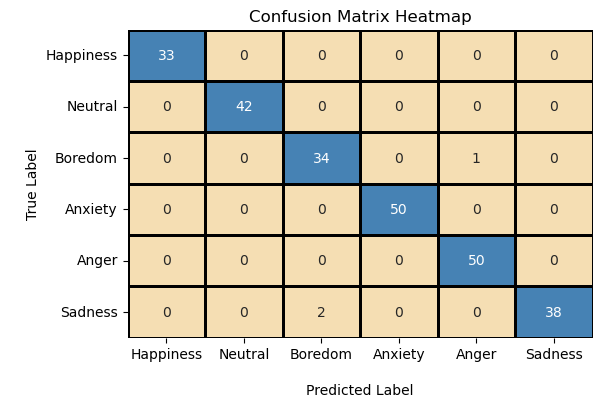

In [274]:
cm = confusion_matrix(y_test, y_test_pred)
colors = ["#F5DEB3", "#4682B4"]
cmap = sns.color_palette(colors, as_cmap=True)
labels = ['Happiness', 'Neutral', 'Boredom', 'Anxiety', 'Anger', 'Sadness']
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=False, linewidths=1, linecolor='black',xticklabels=labels, yticklabels=labels)
plt.xlabel("\nPredicted Label")
plt.ylabel("\nTrue Label")
plt.title("Confusion Matrix Heatmap")
plt.show()


### Confusion Matrix Insights

- **Happiness :** All 33 samples were correctly predicted — **perfect classification**
- **Neutral :** All 42 samples were correctly predicted — **perfect classification**   
- **Boredom :** 34 out of 35 predicted correctly, — 1 misclassified as Anger  
- **Anxiety :** All 50 samples were correctly predicted — **perfect classification**   
- **Anger :** All 50 samples were correctly predicted — **perfect classification**   
- **Sadness :** 38 out of 40 predicted correctly,— 2 misclassified as Boredom

### Overall:
- Model shows **excellent class-wise performance**, especially for most emotions.
- **Minor confusion** between Boredom and Sadness — may be due to **similar patterns** in features.
- No major class is being consistently confused — a sign of a **well-generalized model**.


# Predicting Test Dataset

In [276]:
df= pd.read_csv(r'C:\Users\saisu\OneDrive\Desktop\Project\test.csv')

## Loading Preprocessing models

In [277]:
scaler = joblib.load('scaler.pkl')
model = joblib.load('model.pkl')
encoder = joblib.load('one_hot_encoder.pkl')
selected_columns = joblib.load('selected_columns.pkl')
label_encoder = joblib.load('label_encoder.pkl')

In [278]:
Num= selected_columns['numerical']
Cat =selected_columns['categorical']

In [279]:
for i in df[Cat].keys():
  print(f"{i}\n")
  print(f"Unique Values{df[i].unique()}")

Gender

Unique Values['Female' 'Non-binary' 'Male' '27' 'Marie']
Platform

Unique Values['Snapchat' 'Telegram' 'Facebook' 'Instagram' 'LinkedIn' 'Twitter'
 'Whatsapp']


In [280]:
df=df[df["Gender"].isin(['Female','Non-binary','Male'])]

In [281]:
for i in df[Cat].keys():
  print(f"{i}\n")
  print(f"Unique Values{df[i].unique()}")

Gender

Unique Values['Female' 'Non-binary' 'Male']
Platform

Unique Values['Snapchat' 'Telegram' 'Facebook' 'Instagram' 'LinkedIn' 'Twitter'
 'Whatsapp']


In [282]:
df[Num].dtypes

Age                           object
Daily_Usage_Time (minutes)     int64
Posts_Per_Day                  int64
dtype: object

In [283]:
df["Age"] = pd.to_numeric(df["Age"], errors='coerce')
Num=Num.dropna()

In [284]:
Cat_enc= encoder.transform(df[Cat])


In [285]:
Num_enc = scaler.transform(df[Num])

In [286]:
N=pd.DataFrame(Num_enc,columns=df[Num].keys())

In [287]:
C=pd.DataFrame(Cat_enc,columns=encoder.get_feature_names_out())

In [288]:
x=pd.concat([N,C],axis=1)

In [289]:
df["Dominant_Emotion"]=label_encoder.inverse_transform(model.predict(x))

In [290]:
df.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,500,27,Female,Snapchat,120,4,40,18,22,Neutral
1,488,21,Non-binary,Snapchat,60,1,18,7,12,Neutral
2,776,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety
3,869,27,Male,Telegram,105,3,48,20,28,Anxiety
4,573,21,Non-binary,Facebook,55,3,17,7,12,Neutral
